In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
from random import shuffle
import os
import pickle

In [2]:
def load_pickle(file):
    filename = file+'.pickle'
    with open(filename, 'rb') as p:
        return pickle.load(p)

X_train = load_pickle('X_train')
y_train = load_pickle('y_train')
X_test = load_pickle('X_test')
y_test = load_pickle('y_test')

In [3]:
#build model using keras

model = Sequential()

# tensorboard = TensorBoard()

model.add(Conv2D(32, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = [SparseCategoricalAccuracy()])

hist = model.fit(X_train,y_train, batch_size = 128, epochs = 10, validation_split = 0.1)

model.save('pneumonia_train.h5')

Train on 4708 samples, validate on 524 samples
Epoch 1/10
4708/4708 [==============================] - 225s 48ms/sample - loss: 1.0567 - sparse_categorical_accuracy: 0.5030 - val_loss: 0.9445 - val_sparse_categorical_accuracy: 0.5840
Epoch 2/10
4708/4708 [==============================] - 221s 47ms/sample - loss: 0.7946 - sparse_categorical_accuracy: 0.6648 - val_loss: 0.7903 - val_sparse_categorical_accuracy: 0.6622
Epoch 3/10
4708/4708 [==============================] - 222s 47ms/sample - loss: 0.6166 - sparse_categorical_accuracy: 0.7460 - val_loss: 0.5187 - val_sparse_categorical_accuracy: 0.7481
Epoch 4/10
4708/4708 [==============================] - 225s 48ms/sample - loss: 0.5714 - sparse_categorical_accuracy: 0.7538 - val_loss: 0.5638 - val_sparse_categorical_accuracy: 0.7729
Epoch 5/10
4708/4708 [==============================] - 226s 48ms/sample - loss: 0.5123 - sparse_categorical_accuracy: 0.7797 - val_loss: 0.5367 - val_sparse_categorical_accuracy: 0.7710
Epoch 6/10
4708/47

In [4]:
train_acc = model.evaluate(X_train,y_train ,verbose = False)
test_acc = model.evaluate(X_test, y_test, verbose = False)
yhat_classes = model.predict_classes(X_test, verbose=0)

In [24]:
print(f'Training: Accuracy = {train_acc[1]}\n')
print(f'Test: Accuracy = {test_acc[1]}')

print(test_acc)
print(train_acc)

Training: Accuracy = 0.8453746438026428

Test: Accuracy = 0.7756410241127014
[0.797048956919939, 0.775641]
[0.356100662859208, 0.84537464]


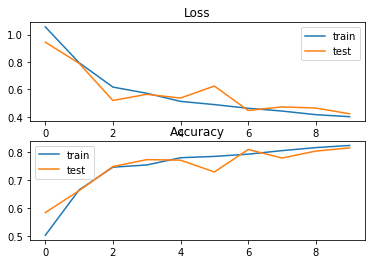

In [21]:
#PLot graphs for loss and accuracy yduring training

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(hist.history['sparse_categorical_accuracy'], label='train')
plt.plot(hist.history['val_sparse_categorical_accuracy'], label='test')
plt.legend()
plt.show()

Accuracy: 0.775641
Precision: 0.791342
Recall: 0.770273
F1 score: 0.757435
Confusion Matrix:
[[138  25  71]
 [  0 235   7]
 [  1  36 111]]


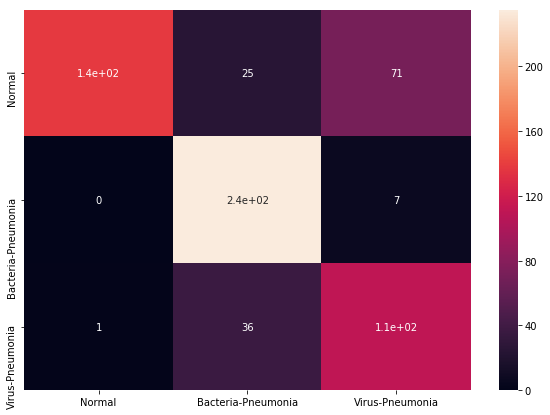

In [23]:
# predict classes for test set

# reduce to 1d array
# yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average = 'macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average = 'macro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes, average = 'macro')
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(f'Confusion Matrix:\n{matrix}')

categories = ['Normal', 'Bacteria-Pneumonia', 'Virus-Pneumonia']
df_cm = pd.DataFrame(matrix, index = [i for i in categories],
                  columns = [i for i in categories])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot = True)

In [ ]:
model = load_model('pneumonia_train.h5')
model_eval = model.evaluate(X_test, y_test, verbose = 0)

In [ ]:
print(model_eval)